# Imbalanced classes experiment, Part 3: Resampling
## May 1st, 2018
### Dr Jose M Albornoz

An experiment to determine good class imbalance compensation strategies. 

An artificially imbalanced dataset with two classes is generated, and the separation between classes in feature space is changed to explore the effect of conventional strategies used to tackle imbalanced classes.

## Conclusions:
1. **Imbalanced classes, clear separation in feature space**: Resampling resulted in a decrease in precision.
2. **Imbalanced classes, no clear separation between classes, positive class has low variance**: Resampling improves the recall of the tree-based estimators with some degradation in precision (more samples of the minority class)
3. **Imbalanced classes, some degree of separation between classes, positive class has low variance**: Resampling improves the recall of the tree-based estimators with some degradation in precision (more samples of the minority class)
4. **Imbalanced classes, no clear separation between classes, both classes have similar variance**: Coin-flip case. Resampling improves the recall of the tree-based estimators with some degradation in precision (more samples of the minority class)

# Import necessary modules

In [577]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
%matplotlib inline

import numpy as np
import seaborn as sbs
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score
from sklearn.cross_validation import cross_val_score
from sklearn.utils import resample
from sklearn.learning_curve import validation_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve

from sklearn.metrics import roc_curve
from sklearn.metrics import auc

from imblearn.over_sampling import SMOTE 

import seaborn as sns

RANDOM_STATE = 801

# 1 Generate data

## 1.1 Number of samples in each class, class varaiance, and class separation

In [578]:
# Case 1: Imbalanced classes, good separation in feature space
# n_samples1 = 4000
# n_samples2 = 200

# sigma1 = 0.9
# sigma2 = 0.9

# offset_x1 = -1.5
# offset_x2 = 0

# Case 2: Imbalanced classes, no clear separation between classes, positive class has low variance
# n_samples1 = 4000
# n_samples2 = 200

# sigma1 = 0.9
# sigma2 = 0.1

# offset_x1 = 2.6
# offset_x2 = -.1

# Case 3: Imbalanced classes, some degree of separation between classes, positive class has low variance
# n_samples1 = 4000
# n_samples2 = 200

# sigma1 = 0.9
# sigma2 = 0.1

# offset_x1 = 1.6
# offset_x2 = -.1

# Case 4: Imbalanced classes, no clear separation between classes, both classes have similar variance
n_samples1 = 4000
n_samples2 = 200

sigma1 = 0.9
sigma2 = 0.9

offset_x1 = 2.6
offset_x2 = -.1

## 1.2 Class separation

In [579]:
# Case 1: Balanced classes, good separation in feature space
# offset_x1 = -1.5
# offset_x2 = 0

# offset_x1 = 2.5
# offset_x2 = 2.5
# offset_x1 = 1.6
# offset_x2 = 1.6
# offset_x1 = 0.5
# offset_x2 = 0.5
# offset_x1 = 2.6
# offset_x2 = -.1


## 1.3 Generate dataset

In [580]:
from sklearn.datasets import make_blobs
X1, y1 = make_blobs(n_samples=n_samples1, n_features=2, centers=1, cluster_std=sigma1, shuffle=True, random_state=0)
X2, y2 = make_blobs(n_samples=n_samples2, n_features=2, centers=1, cluster_std=sigma2, shuffle=True, random_state=1)

In [581]:
y2 = np.ones(n_samples2)

In [582]:
X2[:,0] = X2[:,0] + offset_x1

In [583]:
X2[:,1] = X2[:,1] + offset_x2

In [584]:
X = np.concatenate((X1, X2), axis=0)

In [585]:
y = np.concatenate((y1, y2))

In [586]:
from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=0)

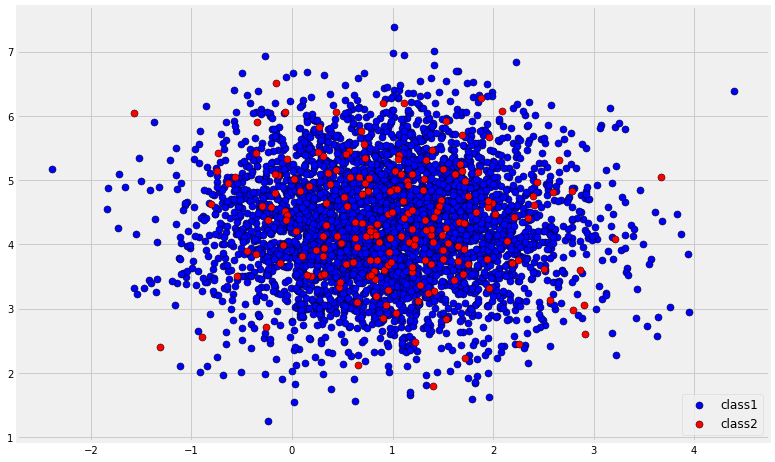

In [587]:
plt.figure(figsize=(12,8))
plt.scatter(X[y==0,0], X[y==0,1], c='blue', marker='o', edgecolor='black', s=50, label = 'class1')
plt.scatter(X[y==1,0], X[y==1,1], c='red', marker='o', edgecolor='black', s=50, label='class2')
plt.legend(loc='lower right', fontsize=12)

# 2 Training and tests sets

In [588]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y, random_state=RANDOM_STATE)

# 3 Data normalisation

In [589]:
scl = StandardScaler()    

In [590]:
scl.fit(X_train_raw)
X_train = scl.transform(X_train_raw)

In [591]:
X_test = scl.transform(X_test_raw)

# 4 Model Definition

In [592]:
# clf1 = RandomForestClassifier(random_state=RANDOM_STATE, n_jobs=-1) 
clf1 = RandomForestClassifier(random_state=RANDOM_STATE, n_jobs=-1, class_weight='balanced') 

In [593]:
# clf2 = DecisionTreeClassifier(random_state=RANDOM_STATE)
clf2 = DecisionTreeClassifier(random_state=RANDOM_STATE, class_weight='balanced')

In [594]:
# clf3 = LogisticRegression(tol=0.1, random_state=RANDOM_STATE)
clf3 = LogisticRegression(tol=0.1, random_state=RANDOM_STATE, class_weight='balanced')

## 4.2 Model fitting

In [595]:
model1 = clf1.fit(X_train, y_train)

In [596]:
model2 = clf2.fit(X_train, y_train)

In [597]:
model3 = clf3.fit(X_train, y_train)

## 4.3 Performance on test set

In [598]:
y_pred1 = model1.predict(X_test)

In [599]:
y_pred2 = model2.predict(X_test)

In [600]:
y_pred3 = model3.predict(X_test)

In [601]:
# random forest
accuracy_score(y_test, y_pred1)

0.9466089466089466

In [602]:
# decision tree
accuracy_score(y_test, y_pred2)

0.9155844155844156

In [603]:
# logistic regression
accuracy_score(y_test, y_pred3)

0.5245310245310245

## 4.4 Confusion Matrix

In [604]:
np.bincount(y_train.astype(int))

array([2680,  134])

In [605]:
np.bincount(y_test.astype(int))

array([1320,   66])

In [606]:
confusion1 = confusion_matrix(y_test, y_pred1)
confusion1

array([[1312,    8],
       [  66,    0]])

Text(0.5,1,'Random Forest')

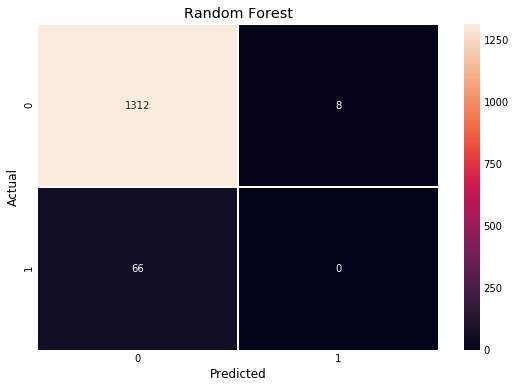

In [607]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.heatmap(confusion1, annot=True, fmt="d", linewidths=.5)
ax.set(xlabel='Predicted', ylabel='Actual')
ax.set_title('Random Forest')

In [608]:
confusion2 = confusion_matrix(y_test, y_pred2)
confusion2

array([[1266,   54],
       [  63,    3]])

Text(0.5,1,'Decision tree')

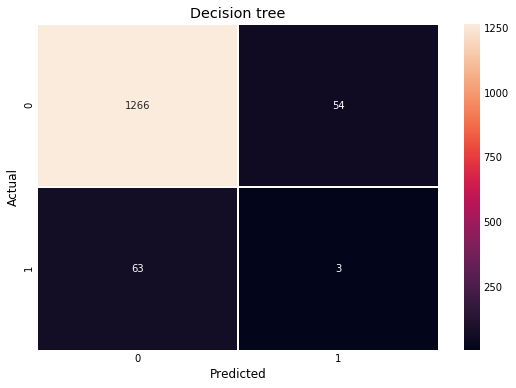

In [609]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.heatmap(confusion2, annot=True, fmt="d", linewidths=.5)
ax.set(xlabel='Predicted', ylabel='Actual')
ax.set_title('Decision tree')

In [610]:
confusion3 = confusion_matrix(y_test, y_pred3)
confusion3

array([[696, 624],
       [ 35,  31]])

Text(0.5,1,'Logistic regression')

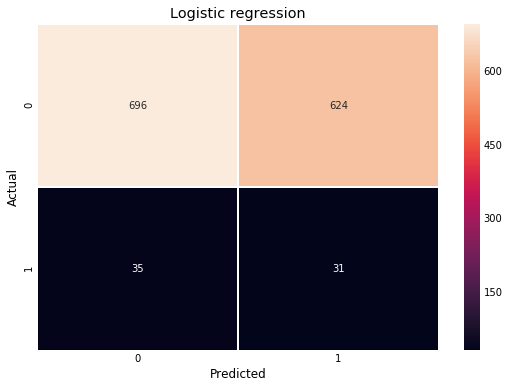

In [611]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.heatmap(confusion3, annot=True, fmt="d", linewidths=.5)
ax.set(xlabel='Predicted', ylabel='Actual')
ax.set_title('Logistic regression')

## 4.5 Accuracy

In [612]:
# Overall, how often is the classifier correct?
# random forest
accuracy_score(y_test, y_pred1)

0.9466089466089466

In [613]:
# Overall, how often is the classifier correct?
# decision tree
accuracy_score(y_test, y_pred2)

0.9155844155844156

In [614]:
# Overall, how often is the classifier correct?
# logistic regression
accuracy_score(y_test, y_pred3)

0.5245310245310245

## 4.6 Classification error

In [615]:
# Overall, how often is the classifier incorrect?
# random forest
1 - accuracy_score(y_test, y_pred1)

0.053391053391053434

In [616]:
# Overall, how often is the classifier incorrect?
# decision tree
1 - accuracy_score(y_test, y_pred2)

0.08441558441558439

In [617]:
# Overall, how often is the classifier incorrect?
# logistic regression
1 - accuracy_score(y_test, y_pred3)

0.4754689754689755

## 4.7 Recall

In [618]:
# When the actual value is positive, how often is the prediction correct?
# random forest
recall_score(y_test, y_pred1)

0.0

In [619]:
# When the actual value is positive, how often is the prediction correct?
# decision tree
recall_score(y_test, y_pred2)

0.045454545454545456

In [620]:
# When the actual value is positive, how often is the prediction correct?
# logistic regression
recall_score(y_test, y_pred3)

0.4696969696969697

## 4.8 Precision

In [621]:
# When a positive value is predicted, how often is the prediction correct?
# random forest
precision_score(y_test, y_pred1)

0.0

In [622]:
# When a positive value is predicted, how often is the prediction correct?
# decision tree
precision_score(y_test, y_pred2)

0.05263157894736842

In [623]:
# When a positive value is predicted, how often is the prediction correct?
# logistic regression
precision_score(y_test, y_pred3)

0.04732824427480916

## 4.9 ROC curve

In [624]:
# Compute fpr, tpr, thresholds and roc auc
probs1 = clf1.predict_proba(X_test)
y_score1 = probs1[:,1]
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_score1)
roc_auc1 = auc(fpr1, tpr1)

In [625]:
# Compute fpr, tpr, thresholds and roc auc
probs2 = clf2.predict_proba(X_test)
y_score2 = probs2[:,1]
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_score2)
roc_auc2 = auc(fpr2, tpr2)

In [626]:
# Compute fpr, tpr, thresholds and roc auc
probs3 = clf3.predict_proba(X_test)
y_score3 = probs3[:,1]
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_score3)
roc_auc3 = auc(fpr3, tpr3)

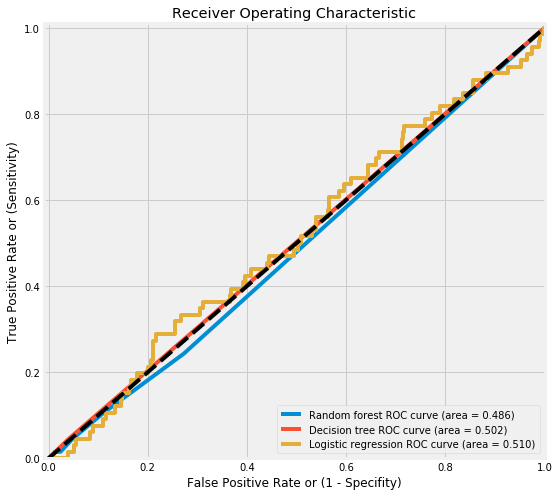

In [627]:
plt.figure(figsize=(8,8))
plt.plot(fpr1, tpr1, label='Random forest ROC curve (area = %0.3f)' % roc_auc1)
plt.plot(fpr2, tpr2, label='Decision tree ROC curve (area = %0.3f)' % roc_auc2)
plt.plot(fpr3, tpr3, label='Logistic regression ROC curve (area = %0.3f)' % roc_auc3)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

## 4.10 Precision-recall curve

In [628]:
precision1, recall1, _ = precision_recall_curve(y_test, y_score1)
precision2, recall2, _ = precision_recall_curve(y_test, y_score2)
precision3, recall3, _ = precision_recall_curve(y_test, y_score3)

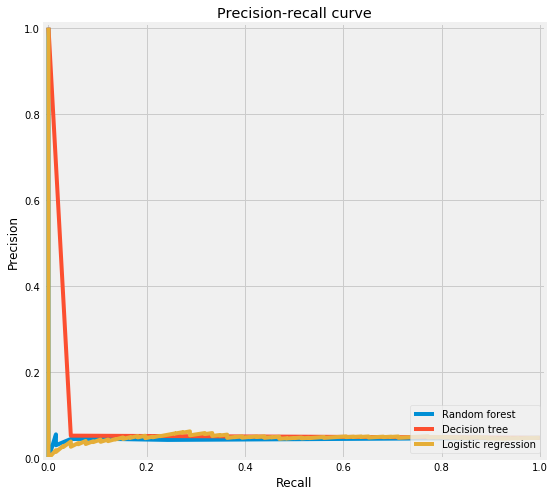

In [629]:
plt.figure(figsize=(8,8))
plt.plot(recall1, precision1, label='Random forest')
plt.plot(recall2, precision2, label='Decision tree')
plt.plot(recall3, precision3, label='Logistic regression')
plt.xlim([-0.01, 1.01])
plt.ylim([0.0, 1.01])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-recall curve')
plt.legend(loc="lower right")

# 5 SMOTE upsampling of training set

In [630]:
class_counts = np.bincount(y_train.astype(int))

In [631]:
class_counts

array([2680,  134])

In [632]:
np.bincount(y_train.astype(int))*100/len(y_train)

array([95.23809524,  4.76190476])

In [633]:
sm = SMOTE(random_state=RANDOM_STATE)

In [634]:
X_train_upsampled, y_train_upsampled = sm.fit_sample(X_train, y_train)

In [635]:
np.bincount(y_train_upsampled.astype(int))

array([2680, 2680])

In [636]:
np.bincount(y_train_upsampled.astype(int))*100/len(y_train_upsampled)

array([50., 50.])

Text(0.5,1,'Original training set')

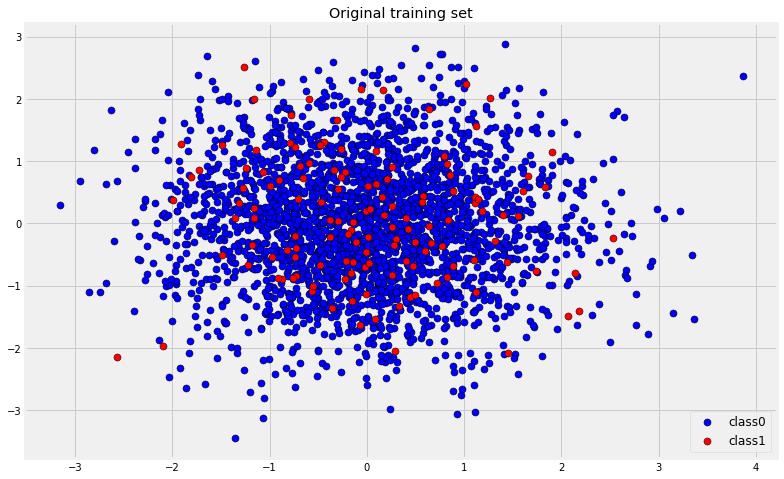

In [637]:
plt.figure(figsize=(12,8))
plt.scatter(X_train_upsampled[y_train_upsampled==0,0], X_train_upsampled[y_train_upsampled==0,1], c='blue', \
            marker='o', edgecolor='black', s=50, label = 'class0')
plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1], c='red', marker='o', edgecolor='black', s=50, \
            label = 'class1')
plt.legend(loc='lower right', fontsize=12)
plt.title('Original training set')

Text(0.5,1,'Training set with SMOTE oversampled minority class')

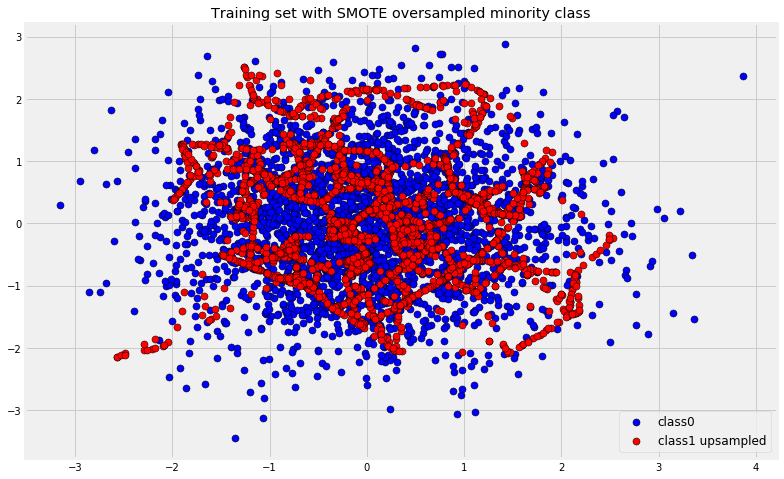

In [638]:
plt.figure(figsize=(12,8))
plt.scatter(X_train_upsampled[y_train_upsampled==0,0], X_train_upsampled[y_train_upsampled==0,1], c='blue', \
            marker='o', edgecolor='black', s=50, label = 'class0')
plt.scatter(X_train_upsampled[y_train_upsampled==1,0], X_train_upsampled[y_train_upsampled==1,1], c='red', \
            marker='o', edgecolor='black', s=50, label='class1 upsampled')
plt.legend(loc='lower right', fontsize=12)
plt.title('Training set with SMOTE oversampled minority class')

# 6 Estimators trained on upsampled data

## 6.1 Model fitting

In [639]:
model1 = clf1.fit(X_train_upsampled, y_train_upsampled)

In [640]:
model2 = clf2.fit(X_train_upsampled, y_train_upsampled)

In [641]:
model3 = clf3.fit(X_train_upsampled, y_train_upsampled)

## 6.2 Performance on test set

In [642]:
y_pred1 = model1.predict(X_test)

In [643]:
y_pred2 = model2.predict(X_test)

In [644]:
y_pred3 = model3.predict(X_test)

In [645]:
# random forest
accuracy_score(y_test, y_pred1)

0.7229437229437229

In [646]:
# decision tree
accuracy_score(y_test, y_pred2)

0.6825396825396826

In [647]:
# logistic regression
accuracy_score(y_test, y_pred3)

0.5173160173160173

## 6.3 Confusion Matrix

In [648]:
np.bincount(y_train.astype(int))

array([2680,  134])

In [649]:
np.bincount(y_test.astype(int))

array([1320,   66])

In [650]:
confusion1 = confusion_matrix(y_test, y_pred1)
confusion1

array([[986, 334],
       [ 50,  16]])

Text(0.5,1,'Random Forest')

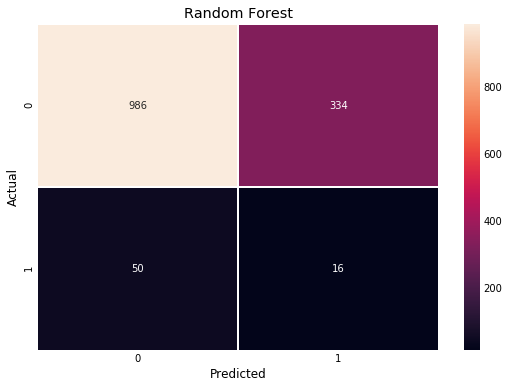

In [651]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.heatmap(confusion1, annot=True, fmt="d", linewidths=.5)
ax.set(xlabel='Predicted', ylabel='Actual')
ax.set_title('Random Forest')

In [652]:
confusion2 = confusion_matrix(y_test, y_pred2)
confusion2

array([[929, 391],
       [ 49,  17]])

Text(0.5,1,'Decision tree')

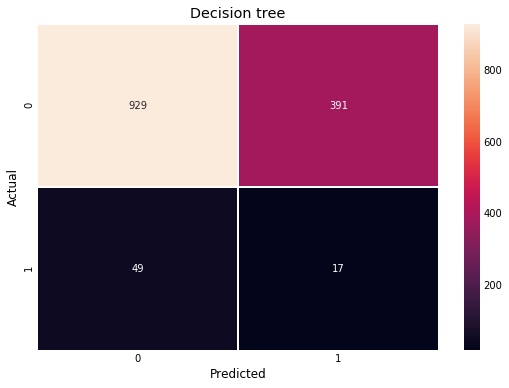

In [653]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.heatmap(confusion2, annot=True, fmt="d", linewidths=.5)
ax.set(xlabel='Predicted', ylabel='Actual')
ax.set_title('Decision tree')

In [654]:
confusion3 = confusion_matrix(y_test, y_pred3)
confusion3

array([[686, 634],
       [ 35,  31]])

Text(0.5,1,'Logistic regression')

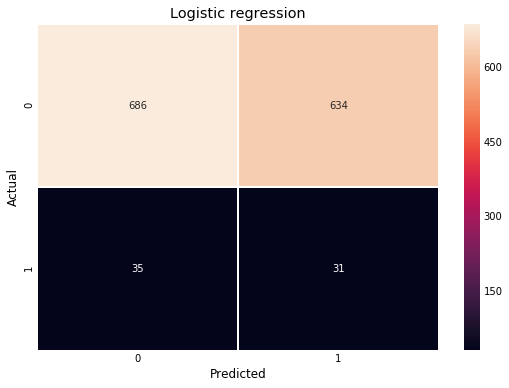

In [655]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.heatmap(confusion3, annot=True, fmt="d", linewidths=.5)
ax.set(xlabel='Predicted', ylabel='Actual')
ax.set_title('Logistic regression')

## 6.4 Accuracy

In [656]:
# Overall, how often is the classifier correct?
# random forest
accuracy_score(y_test, y_pred1)

0.7229437229437229

In [657]:
# Overall, how often is the classifier correct?
# decision tree
accuracy_score(y_test, y_pred2)

0.6825396825396826

In [658]:
# Overall, how often is the classifier correct?
# logistic regression
accuracy_score(y_test, y_pred3)

0.5173160173160173

## 6.5 Classification error

In [659]:
# Overall, how often is the classifier incorrect?
# random forest
1 - accuracy_score(y_test, y_pred1)

0.2770562770562771

In [660]:
# Overall, how often is the classifier incorrect?
# decision tree
1 - accuracy_score(y_test, y_pred2)

0.31746031746031744

In [661]:
# Overall, how often is the classifier incorrect?
# logistic regression
1 - accuracy_score(y_test, y_pred3)

0.4826839826839827

## 6.6 Recall

In [662]:
# When the actual value is positive, how often is the prediction correct?
# random forest
recall_score(y_test, y_pred1)

0.24242424242424243

In [663]:
# When the actual value is positive, how often is the prediction correct?
# decision tree
recall_score(y_test, y_pred2)

0.25757575757575757

In [664]:
# When the actual value is positive, how often is the prediction correct?
# logistic regression
recall_score(y_test, y_pred3)

0.4696969696969697

## 6.7 Precision

In [665]:
# When a positive value is predicted, how often is the prediction correct?
# random forest
precision_score(y_test, y_pred1)

0.045714285714285714

In [666]:
# When a positive value is predicted, how often is the prediction correct?
# decision tree
precision_score(y_test, y_pred2)

0.041666666666666664

In [667]:
# When a positive value is predicted, how often is the prediction correct?
# logistic regression
precision_score(y_test, y_pred3)

0.04661654135338346

## 6.8 ROC curve

In [668]:
# Compute fpr, tpr, thresholds and roc auc
probs1 = clf1.predict_proba(X_test)
y_score1 = probs1[:,1]
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_score1)
roc_auc1 = auc(fpr1, tpr1)

In [669]:
# Compute fpr, tpr, thresholds and roc auc
probs2 = clf2.predict_proba(X_test)
y_score2 = probs2[:,1]
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_score2)
roc_auc2 = auc(fpr2, tpr2)

In [670]:
# Compute fpr, tpr, thresholds and roc auc
probs3 = clf3.predict_proba(X_test)
y_score3 = probs3[:,1]
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_score3)
roc_auc3 = auc(fpr3, tpr3)

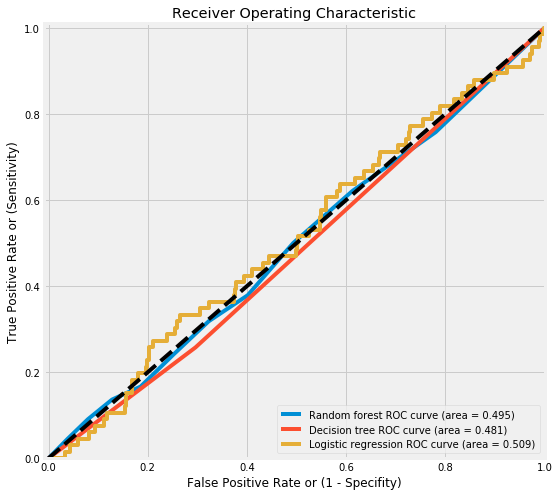

In [671]:
plt.figure(figsize=(8,8))
plt.plot(fpr1, tpr1, label='Random forest ROC curve (area = %0.3f)' % roc_auc1)
plt.plot(fpr2, tpr2, label='Decision tree ROC curve (area = %0.3f)' % roc_auc2)
plt.plot(fpr3, tpr3, label='Logistic regression ROC curve (area = %0.3f)' % roc_auc3)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

## 6.9 Precision-recall curve

In [672]:
precision1, recall1, _ = precision_recall_curve(y_test, y_score1)
precision2, recall2, _ = precision_recall_curve(y_test, y_score2)
precision3, recall3, _ = precision_recall_curve(y_test, y_score3)

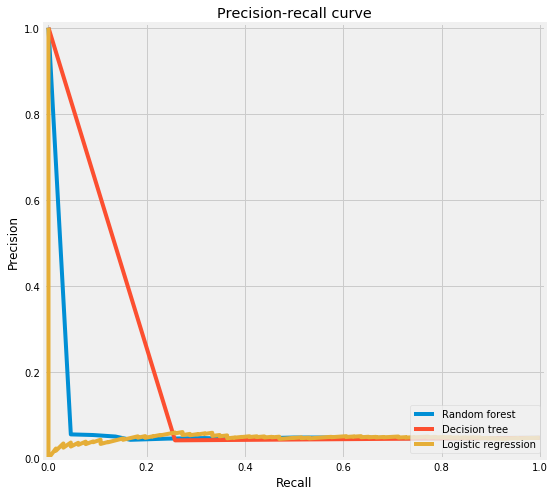

In [673]:
plt.figure(figsize=(8,8))
plt.plot(recall1, precision1, label='Random forest')
plt.plot(recall2, precision2, label='Decision tree')
plt.plot(recall3, precision3, label='Logistic regression')
plt.xlim([-0.01, 1.01])
plt.ylim([0.0, 1.01])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-recall curve')
plt.legend(loc="lower right")

# 7 Downsampling majority class

In [674]:
class_counts = np.bincount(y_train.astype(int))

In [675]:
class_counts

array([2680,  134])

In [676]:
# proportion of majority and minority classes
np.bincount(y.astype(int))*100/len(y)

array([95.23809524,  4.76190476])

In [677]:
X_train_majority = X_train[y_train==0,:]

In [678]:
X_train_minority = X_train[y_train==1,:]

In [679]:
idx = np.random.choice(np.arange(X_train_majority.shape[0]), class_counts[1], replace=False)

In [680]:
X_train_majority_downsampled = X_train_majority[idx,:]

In [681]:
y_train_majority_downsampled = np.zeros(len(idx))
y_train_minority_downsampled = np.ones(len(idx)).astype(int)

In [682]:
X_train_downsampled = np.concatenate((X_train_majority_downsampled, X_train_minority), axis=0)

In [683]:
y_train_downsampled = np.concatenate((y_train_majority_downsampled, y_train_minority_downsampled))

In [684]:
from sklearn.utils import shuffle
X_train_downsampled, y_train_downsampled = shuffle(X_train_downsampled, y_train_downsampled)

Text(0.5,1,'Training set with downsampled majority class')

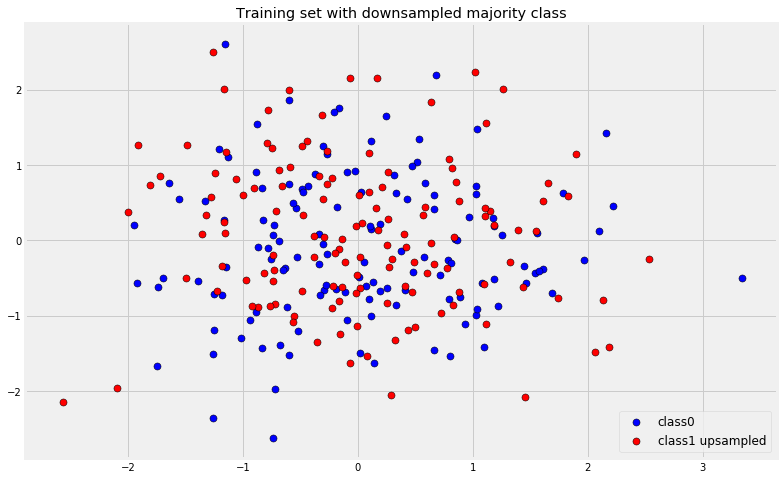

In [685]:
plt.figure(figsize=(12,8))
plt.scatter(X_train_downsampled[y_train_downsampled==0,0], X_train_downsampled[y_train_downsampled==0,1], c='blue', \
            marker='o', edgecolor='black', s=50, label = 'class0')
plt.scatter(X_train_downsampled[y_train_downsampled==1,0], X_train_downsampled[y_train_downsampled==1,1], c='red', \
            marker='o', edgecolor='black', s=50, label='class1 upsampled')
plt.legend(loc='lower right', fontsize=12)
plt.title('Training set with downsampled majority class')

# 8 Estimators trained on downsampled majority class

## 8.1 Model fitting

In [686]:
model1 = clf1.fit(X_train_downsampled, y_train_downsampled)

In [687]:
model2 = clf2.fit(X_train_downsampled, y_train_downsampled)

In [688]:
model3 = clf3.fit(X_train_downsampled, y_train_downsampled)

## 8.2 Performance on test set

In [689]:
y_pred1 = model1.predict(X_test)

In [690]:
y_pred2 = model2.predict(X_test)

In [691]:
y_pred3 = model3.predict(X_test)

In [692]:
# random forest
accuracy_score(y_test, y_pred1)

0.5266955266955267

In [693]:
# decision tree
accuracy_score(y_test, y_pred2)

0.4588744588744589

In [694]:
# logistic regression
accuracy_score(y_test, y_pred3)

0.5151515151515151

## 8.3 Confusion Matrix

In [695]:
np.bincount(y_train.astype(int))

array([2680,  134])

In [696]:
np.bincount(y_test.astype(int))

array([1320,   66])

In [697]:
confusion1 = confusion_matrix(y_test, y_pred1)
confusion1

array([[697, 623],
       [ 33,  33]])

Text(0.5,1,'Random Forest')

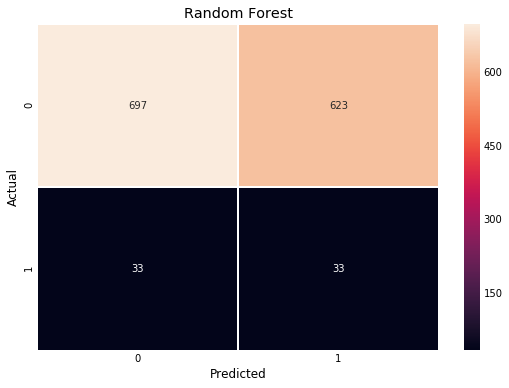

In [698]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.heatmap(confusion1, annot=True, fmt="d", linewidths=.5)
ax.set(xlabel='Predicted', ylabel='Actual')
ax.set_title('Random Forest')

In [699]:
confusion2 = confusion_matrix(y_test, y_pred2)
confusion2

array([[598, 722],
       [ 28,  38]])

Text(0.5,1,'Decision tree')

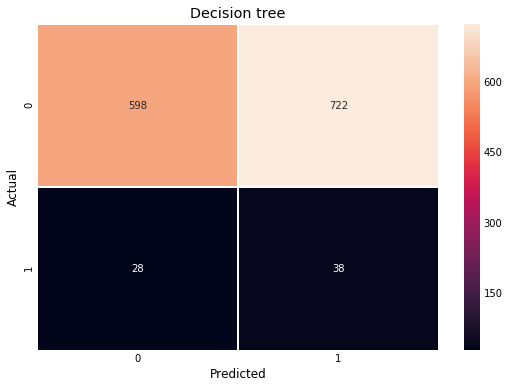

In [700]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.heatmap(confusion2, annot=True, fmt="d", linewidths=.5)
ax.set(xlabel='Predicted', ylabel='Actual')
ax.set_title('Decision tree')

In [701]:
confusion3 = confusion_matrix(y_test, y_pred3)
confusion3

array([[682, 638],
       [ 34,  32]])

Text(0.5,1,'Logistic regression')

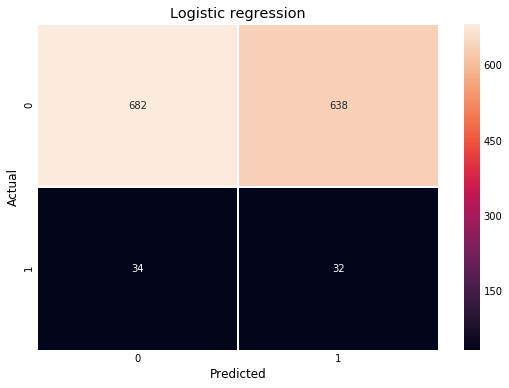

In [702]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.heatmap(confusion3, annot=True, fmt="d", linewidths=.5)
ax.set(xlabel='Predicted', ylabel='Actual')
ax.set_title('Logistic regression')

## 8.4 Accuracy

In [703]:
# Overall, how often is the classifier correct?
# random forest
accuracy_score(y_test, y_pred1)

0.5266955266955267

In [704]:
# Overall, how often is the classifier correct?
# decision tree
accuracy_score(y_test, y_pred2)

0.4588744588744589

In [705]:
# Overall, how often is the classifier correct?
# logistic regression
accuracy_score(y_test, y_pred3)

0.5151515151515151

## 8.5 Classification error

In [706]:
# Overall, how often is the classifier incorrect?
# random forest
1 - accuracy_score(y_test, y_pred1)

0.47330447330447334

In [707]:
# Overall, how often is the classifier incorrect?
# decision tree
1 - accuracy_score(y_test, y_pred2)

0.5411255411255411

In [708]:
# Overall, how often is the classifier incorrect?
# logistic regression
1 - accuracy_score(y_test, y_pred3)

0.48484848484848486

## 8.6 Recall

In [709]:
# When the actual value is positive, how often is the prediction correct?
# random forest
recall_score(y_test, y_pred1)

0.5

In [710]:
# When the actual value is positive, how often is the prediction correct?
# decision tree
recall_score(y_test, y_pred2)

0.5757575757575758

In [711]:
# When the actual value is positive, how often is the prediction correct?
# logistic regression
recall_score(y_test, y_pred3)

0.48484848484848486

## 8.7 Precision

In [712]:
# When a positive value is predicted, how often is the prediction correct?
# random forest
precision_score(y_test, y_pred1)

0.05030487804878049

In [713]:
# When a positive value is predicted, how often is the prediction correct?
# decision tree
precision_score(y_test, y_pred2)

0.05

In [714]:
# When a positive value is predicted, how often is the prediction correct?
# logistic regression
precision_score(y_test, y_pred3)

0.04776119402985075

## 8.8 ROC curve

In [715]:
# Compute fpr, tpr, thresholds and roc auc
probs1 = clf1.predict_proba(X_test)
y_score1 = probs1[:,1]
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_score1)
roc_auc1 = auc(fpr1, tpr1)

In [716]:
# Compute fpr, tpr, thresholds and roc auc
probs2 = clf2.predict_proba(X_test)
y_score2 = probs2[:,1]
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_score2)
roc_auc2 = auc(fpr2, tpr2)

In [717]:
# Compute fpr, tpr, thresholds and roc auc
probs3 = clf3.predict_proba(X_test)
y_score3 = probs3[:,1]
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_score3)
roc_auc3 = auc(fpr3, tpr3)

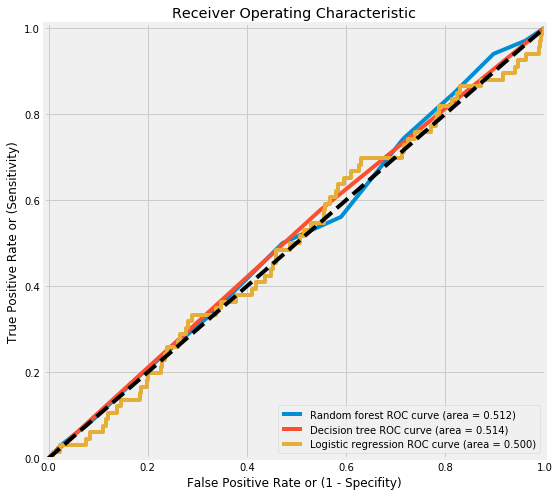

In [718]:
plt.figure(figsize=(8,8))
plt.plot(fpr1, tpr1, label='Random forest ROC curve (area = %0.3f)' % roc_auc1)
plt.plot(fpr2, tpr2, label='Decision tree ROC curve (area = %0.3f)' % roc_auc2)
plt.plot(fpr3, tpr3, label='Logistic regression ROC curve (area = %0.3f)' % roc_auc3)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

## 8.9 Precision-recall curve

In [719]:
precision1, recall1, _ = precision_recall_curve(y_test, y_score1)
precision2, recall2, _ = precision_recall_curve(y_test, y_score2)
precision3, recall3, _ = precision_recall_curve(y_test, y_score3)

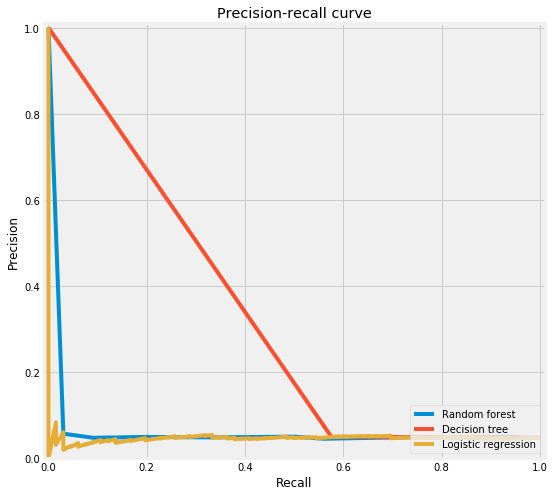

In [720]:
plt.figure(figsize=(8,8))
plt.plot(recall1, precision1, label='Random forest')
plt.plot(recall2, precision2, label='Decision tree')
plt.plot(recall3, precision3, label='Logistic regression')
plt.xlim([-0.01, 1.01])
plt.ylim([0.0, 1.01])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-recall curve')
plt.legend(loc="lower right")